In [2]:
import numpy  as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = ['PG','^GSPC']
df = pd.DataFrame()
for t in x:
    df[t] = wb.DataReader(t,data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
df

,PG,^GSPC
Date,,
2009-12-31,45.503147,1115.099976
2010-01-04,45.870895,1132.989990
2010-01-05,45.885899,1136.520020
2010-01-06,45.668251,1137.140015
2010-01-07,45.420593,1141.689941
2010-01-08,45.360538,1144.979980
2010-01-11,45.180416,1146.979980
2010-01-12,45.698273,1136.219971
2010-01-13,46.171093,1145.680054


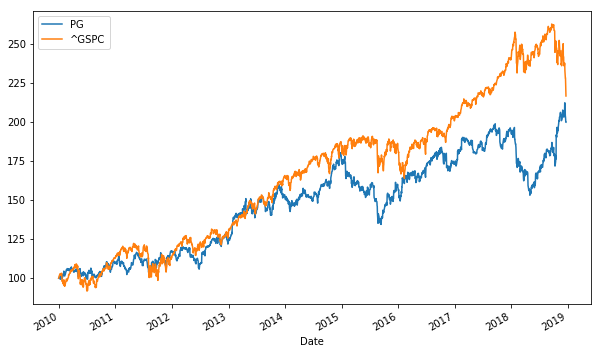

In [6]:
((df/df.iloc[0])*100).plot(figsize = (10,6))

In [7]:
df.mean()*250

PG        16759.442956
^GSPC    463780.189035
dtype: float64

In [8]:
log_return = np.log(df/df.shift(1))

In [9]:
log_return.mean()*250

PG       0.076665
^GSPC    0.085592
dtype: float64

In [10]:
log_return.cov()*250

,PG,^GSPC
PG,0.020823,0.011351
^GSPC,0.011351,0.022104


In [11]:
log_return.corr()

,PG,^GSPC
PG,1.000000,0.529076
^GSPC,0.529076,1.000000


In [16]:
num_assets = len(x)

In [17]:
num_assets

2

In [18]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

In [19]:
weights

array([0.52416925, 0.47583075])

In [20]:
port_return = np.sum(weights*log_return.mean())*250

In [21]:
port_return

0.08091293482680939

In [26]:
port_var = np.dot(weights.T,np.dot(log_return.cov()*250,weights))
port_var

0.016387766925334335

In [27]:
port_var

0.016387766925334335

In [29]:
port_vol=[]
port_ret=[]
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights);
    port_ret.append(np.sum(weights*log_return.mean())*250)
    port_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*250,weights))))
port_vol = np.array(port_vol)
port_ret = np.array(port_ret)

In [30]:
port_vol

array([0.1430849 , 0.12823624, 0.13033362, 0.14657913, 0.12855458,
       0.1339289 , 0.13608362, 0.12801035, 0.14543255, 0.14699516,
       0.13135998, 0.13009141, 0.13062509, 0.13263453, 0.12880963,
       0.1375739 , 0.13473824, 0.12808546, 0.13648932, 0.13767704,
       0.12842465, 0.13087804, 0.13129021, 0.14387835, 0.13609953,
       0.13482093, 0.12817472, 0.13556729, 0.13064067, 0.12803527,
       0.12817878, 0.12928294, 0.14544452, 0.13049131, 0.14118923,
       0.14392208, 0.12999715, 0.13047721, 0.12882541, 0.12804789,
       0.13454204, 0.1284112 , 0.13351446, 0.12804891, 0.12826823,
       0.13438178, 0.13176018, 0.12804716, 0.12805119, 0.13071969,
       0.13094747, 0.12842646, 0.12811549, 0.14391939, 0.12826914,
       0.1296569 , 0.14026923, 0.12824225, 0.1301324 , 0.13173675,
       0.12871267, 0.13094165, 0.12815212, 0.12950329, 0.12818246,
       0.12850225, 0.12805443, 0.13777403, 0.12936797, 0.12956738,
       0.14081598, 0.13481908, 0.1280177 , 0.12803628, 0.13288

In [31]:
portfolio_eff = pd.DataFrame({'Returns':port_ret,'Volatility':port_vol})

In [33]:
portfolio_eff.head()

,Returns,Volatility
0,0.076833,0.143085
1,0.081324,0.128236
2,0.079308,0.130334
3,0.085328,0.146579
4,0.081588,0.128555


Text(0,0.5,'Returns')

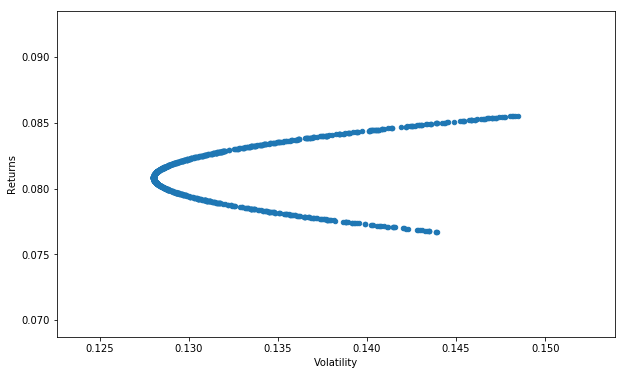

In [34]:
portfolio_eff.plot(x = 'Volatility',y = 'Returns',kind = 'scatter',figsize=(10,6))
plt.xlabel('Volatility')
plt.ylabel('Returns')